Load packages

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install requests
#import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
import tensorflow as tf
import keras
from tensorflow.python.client import device_lib

Using TensorFlow backend.


In [2]:
#Reading files/documents
#using all unlabeled data
path = '/media/qiwei/work/Python_playground/VAE/TCGA_5_cancers/counts_data/high_var_counts_data/TCGA_(BLCA_COAD_SARC_PAAD_BRCA)_(0.2chemo)VSTnrom_count_expr_clinical_data.txt'

#only use labeled data
#path = "counts_data/counts_data_without_label/TCGA_SARC_(0.2chemo_45samples)VSTnrom_count_expr_clinical_data.tsv"

#open(path).readline()
#gene expression RNAseq, Batch effects normalized mRNA data

ExprAlldata = pd.read_csv(path, sep = "\t", index_col = 0)
ExprAlldata = ExprAlldata.dropna(axis='columns')
#ExprAlldata.columns = ["Gene", "Counts"]
ExprAlldata.shape

(2606, 13854)

In [3]:
ExprAlldata.head(10)

,ENSG00000000003.13,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,ENSG00000001460.16,...,ENSG00000280237.1,ENSG00000280411.1,ENSG00000280734.1,ENSG00000280789.1,ENSG00000280798.1,ENSG00000280832.1,ENSG00000281332.1,ENSG00000281398.1,ENSG00000281406.1,ENSG00000281649.1
TCGA-2F-A9KO-01A,12.799987,11.730276,10.407923,9.657609,8.874620,13.307831,11.095982,13.282889,10.770459,8.746838,...,6.144644,7.890611,9.487477,8.197412,8.170328,6.616274,7.787851,7.497947,5.870692,11.652532
TCGA-2F-A9KP-01A,13.361298,11.061773,9.586506,9.498557,7.200246,8.611701,11.850127,12.652118,10.921566,9.844942,...,5.771074,4.784194,7.916190,8.448300,8.392858,8.582964,7.607547,8.687574,5.683720,10.179641
TCGA-2F-A9KQ-01A,12.427114,10.858984,10.020076,8.675861,8.320863,9.012543,12.080271,11.863083,10.551890,9.549010,...,5.740098,3.684469,8.097340,8.346210,8.335397,8.058829,7.888971,7.463664,6.561208,10.483294
TCGA-2F-A9KR-01A,11.875239,10.705175,9.764255,8.405577,8.925498,12.227532,10.628745,12.078019,11.463515,9.132176,...,7.327783,5.415932,9.231014,8.487673,7.773246,6.392280,8.318976,8.227283,9.256157,10.934495
TCGA-2F-A9KT-01A,11.954888,11.752691,9.122707,8.559944,8.718170,8.458566,11.524538,10.485555,10.499527,9.090295,...,4.963758,4.448101,7.812737,8.470598,8.690529,7.598719,6.998807,7.468975,8.113118,10.653249
TCGA-2F-A9KW-01A,11.468420,11.061783,9.312141,9.965565,8.550213,9.807898,12.358200,9.871534,9.871534,10.231835,...,6.353143,5.314622,6.651675,8.697122,8.608569,7.492498,6.486258,7.499733,4.415505,10.468635
TCGA-4Z-AA7M-01A,13.197630,11.414380,10.219118,10.788953,7.772503,12.095388,11.508418,11.449940,11.903441,9.516233,...,6.634540,6.493163,8.312580,9.647659,8.187388,7.330619,7.298461,8.553173,3.684469,10.484015
TCGA-4Z-AA7N-01A,12.174796,10.869039,9.121627,8.385069,9.462555,11.854642,10.862057,11.897782,12.016443,9.256974,...,8.231678,9.887549,7.464718,8.115185,8.536419,7.281195,7.440165,7.921429,6.084329,11.710244
TCGA-4Z-AA7O-01A,13.567112,10.594178,10.312412,10.017215,8.507531,13.678473,12.017644,13.002540,10.978519,8.879034,...,5.059161,9.070366,8.712092,8.691521,7.733842,7.594347,7.764660,5.803181,7.057987,10.368587
TCGA-4Z-AA7Q-01A,12.239840,10.592417,10.313506,9.301482,9.700270,11.769390,11.416655,10.717529,11.418768,8.496318,...,6.408897,9.609250,8.925624,7.917317,8.364937,6.483733,7.683860,7.202534,7.180692,11.487663


In [4]:
#check mean and variance, to prove it is z-score
#ExprAlldata.var(axis = 0)

In [5]:
#ExprAlldata.mean(axis = 0)

In [6]:
any_na = np.any(np.isnan(ExprAlldata))
print ('There exists NA value: ' + repr (any_na))

all_finite = np.all(np.isfinite(ExprAlldata))
print ('All values are finite: ' + repr (all_finite))

There exists NA value: ENSG00000000003.13    False
ENSG00000000419.11    False
ENSG00000000457.12    False
ENSG00000000460.15    False
ENSG00000000938.11    False
ENSG00000000971.14    False
ENSG00000001036.12    False
ENSG00000001084.9     False
ENSG00000001167.13    False
ENSG00000001460.16    False
ENSG00000001461.15    False
ENSG00000001497.15    False
ENSG00000001561.6     False
ENSG00000001617.10    False
ENSG00000001626.13    False
ENSG00000001629.8     False
ENSG00000001630.14    False
ENSG00000001631.13    False
ENSG00000002016.15    False
ENSG00000002330.12    False
ENSG00000002549.11    False
ENSG00000002586.16    False
ENSG00000002587.8     False
ENSG00000002726.18    False
ENSG00000002822.14    False
ENSG00000002834.16    False
ENSG00000002919.13    False
ENSG00000002933.6     False
ENSG00000003056.6     False
ENSG00000003096.12    False
                      ...  
ENSG00000278948.1     False
ENSG00000278970.1     False
ENSG00000278978.1     False
ENSG00000279010.1     Fal

In [7]:
#minmax data transformation

from sklearn import preprocessing

#built up data frame
from pandas import DataFrame, Series
Exprframe = DataFrame(ExprAlldata)
#Exprframe = ExprAlldata.T
Exprframe_og = Exprframe

# Scale RNAseq data using zero-one normalization
Exprframe_zerone = preprocessing.MinMaxScaler().fit_transform(Exprframe)
Exprframe_zerone.shape

#change column name
#Exprframe.columns.values[0] = "Gene"

#set rownames
#Exprframe = Exprframe.set_index('Gene')
#Exprframe

(2606, 13854)

In [8]:
# logistic transformation, logistic sigmoid function
#def logits(x):
#    return 1 / (1 + np.exp(-x))

#Exprframe_logit = logits(Exprframe)
#Exprframe_logit.shape

In [9]:
# Standardize
#scaler = preprocessing.StandardScaler()
#scaler.fit((Exprframe))
#Exprfram_std = scaler.transform(Exprframe)
#Exprfram_std.shape

In [10]:
# If select the minmax method
Exprframe = pd.DataFrame(Exprframe_zerone,
                         columns=Exprframe.columns,
                         index=Exprframe.index)

# If select the logistic transformation method
#Exprframe = pd.DataFrame(Exprframe_logit,
#                         columns=Exprframe.columns,
#                         index=Exprframe.index)

# If select the Standardization method
#Exprframe = pd.DataFrame(Exprfram_std,
#                         columns=Exprframe.columns,
#                         index=Exprframe.index)

# If use no transformation
#Exprframe = Exprframe_og

#
print(Exprframe.shape)
Exprframe.head(3)

#output log transformed data
#log_file = "counts_data/vae_compressed/log_transformed(0.2_var,3layers,0.1test,log).tsv"
#Exprframe.to_csv(log_file, sep='\t')

(2606, 13854)


,ENSG00000000003.13,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,ENSG00000001460.16,...,ENSG00000280237.1,ENSG00000280411.1,ENSG00000280734.1,ENSG00000280789.1,ENSG00000280798.1,ENSG00000280832.1,ENSG00000281332.1,ENSG00000281398.1,ENSG00000281406.1,ENSG00000281649.1
TCGA-2F-A9KO-01A,0.710164,0.617211,0.519420,0.520146,0.473982,0.695137,0.373994,0.695573,0.292612,0.447058,...,0.268724,0.390196,0.644923,0.278018,0.249006,0.293353,0.374109,0.534897,0.392118,0.531080
TCGA-2F-A9KP-01A,0.767971,0.514313,0.360030,0.497071,0.245305,0.234815,0.478106,0.611301,0.313018,0.585465,...,0.229878,0.164490,0.430483,0.323095,0.292155,0.629785,0.345000,0.662733,0.370235,0.275593
TCGA-2F-A9KQ-01A,0.671763,0.483099,0.444161,0.377714,0.398353,0.274106,0.509878,0.505885,0.263095,0.548165,...,0.226656,0.084586,0.455205,0.304753,0.281014,0.540124,0.390434,0.531213,0.472933,0.328265


In [11]:
import math

#contruct training dataset

n_genes = Exprframe.shape[1]

print ('number of genes is ' + repr (n_genes))


number of genes is 13854


In [12]:
#test tensorflow, remember to change the kernel

import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

a = tf.constant(10)
b = tf.constant(32)
print("10 + 32 = ", sess.run(a + b))

b'Hello, TensorFlow!'
10 + 32 =  42


In [13]:
#######################################################################################################
#check the system information, check if cuda and gpu computing for tensorflow is installed properly
print("whether tensorflow is built with cuda: ", tf.test.is_built_with_cuda())
print("whether gpu computing is available for tensorflow: ", tf.test.is_gpu_available())
print("using keras version: ", keras.__version__)
print("using tensorflow version: ", tf.__version__)
print("\n")
print("Device details:\n", device_lib.list_local_devices())
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

whether tensorflow is built with cuda:  True
whether gpu computing is available for tensorflow:  True
using keras version:  2.1.3
using tensorflow version:  1.4.1


Device details:
 [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10782626773613020017
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 987955200
locality {
  bus_id: 1
}
incarnation: 12060120876115302169
physical_device_desc: "device: 0, name: TITAN RTX, pci bus id: 0000:01:00.0, compute capability: 7.5"
]
Default GPU Device: /device:GPU:0


In [14]:
#import the data as training data

#Expr_array = Exprframe.values
#Expr_array = np.float32(Expr_array)

#set the random state to 42

# Split 10% test set randomly
test_set_percent = 0.1
Exprframe_test = Exprframe.sample(frac=test_set_percent, random_state = 42)
Exprframe_train = Exprframe.drop(Exprframe_test.index)
Exprframe_train.head(10)

,ENSG00000000003.13,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,ENSG00000001460.16,...,ENSG00000280237.1,ENSG00000280411.1,ENSG00000280734.1,ENSG00000280789.1,ENSG00000280798.1,ENSG00000280832.1,ENSG00000281332.1,ENSG00000281398.1,ENSG00000281406.1,ENSG00000281649.1
TCGA-2F-A9KO-01A,0.710164,0.617211,0.519420,0.520146,0.473982,0.695137,0.373994,0.695573,0.292612,0.447058,...,0.268724,0.390196,0.644923,0.278018,0.249006,0.293353,0.374109,0.534897,0.392118,0.531080
TCGA-2F-A9KP-01A,0.767971,0.514313,0.360030,0.497071,0.245305,0.234815,0.478106,0.611301,0.313018,0.585465,...,0.229878,0.164490,0.430483,0.323095,0.292155,0.629785,0.345000,0.662733,0.370235,0.275593
TCGA-2F-A9KQ-01A,0.671763,0.483099,0.444161,0.377714,0.398353,0.274106,0.509878,0.505885,0.263095,0.548165,...,0.226656,0.084586,0.455205,0.304753,0.281014,0.540124,0.390434,0.531213,0.472933,0.328265
TCGA-2F-A9KR-01A,0.614928,0.459424,0.394521,0.338501,0.480931,0.589245,0.309490,0.534601,0.386206,0.495627,...,0.391754,0.210391,0.609922,0.330170,0.172009,0.255035,0.459854,0.613271,0.788340,0.406530
TCGA-2F-A9KT-01A,0.623130,0.620661,0.270033,0.360897,0.452615,0.219804,0.433157,0.321845,0.256024,0.490348,...,0.145928,0.140070,0.416364,0.327102,0.349875,0.461415,0.246724,0.531783,0.654563,0.357745
TCGA-2F-A9KW-01A,0.573031,0.514314,0.306792,0.564824,0.429676,0.352068,0.548247,0.239811,0.171217,0.634230,...,0.290405,0.203030,0.257909,0.367801,0.333983,0.443244,0.163978,0.535088,0.221808,0.325722
TCGA-4Z-AA7M-01A,0.751115,0.568587,0.482784,0.684281,0.323461,0.576292,0.430932,0.450688,0.445616,0.544034,...,0.319666,0.288660,0.484580,0.538584,0.252314,0.415552,0.295101,0.648291,0.136250,0.328390
TCGA-4Z-AA7N-01A,0.645778,0.484646,0.269824,0.335526,0.554279,0.552693,0.341699,0.510521,0.460876,0.511356,...,0.485747,0.535289,0.368868,0.263245,0.319993,0.407097,0.317978,0.580404,0.417121,0.541091
TCGA-4Z-AA7O-01A,0.789167,0.442339,0.500887,0.572318,0.423847,0.731468,0.501232,0.658118,0.320710,0.463720,...,0.155848,0.475914,0.539103,0.366795,0.164369,0.460667,0.370365,0.352778,0.531074,0.308368
TCGA-4Z-AA7Q-01A,0.652476,0.442068,0.501099,0.468479,0.586745,0.544337,0.418263,0.352837,0.380163,0.415482,...,0.296202,0.515069,0.568244,0.227694,0.286742,0.270680,0.357320,0.503152,0.545435,0.502482


Load packages and use tensorflow as backend

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.layers import Input, Dense, Lambda, Layer, Activation
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras import backend as K
from keras import metrics, optimizers
from keras import losses
from keras.callbacks import Callback
import keras
from keras import utils

import pydot
import graphviz
from keras.utils import plot_model
from keras_tqdm import TQDMNotebookCallback
#from .tqdm_callback import TQDMNotebookCallback
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


Load functions and classes
This will facilitate connections between layers and also custom hyperparameters

In [16]:
# Function for reparameterization trick to make model differentiable
def sampling(args):
    
    import tensorflow as tf
    # Function with args required for Keras Lambda function
    z_mean, z_log_var = args

    # Draw epsilon of the same shape from a standard normal distribution
    epsilon = K.random_normal(shape=tf.shape(z_mean), mean=0.,
                              stddev=epsilon_std)
    
    # The latent vector is non-deterministic and differentiable
    # in respect to z_mean and z_log_var
    z = z_mean + K.exp(z_log_var / 2) * epsilon
    return z


class CustomVariationalLayer(Layer):
    """
    Define a custom layer that learns and performs the training
    This function is borrowed from:
    https://github.com/fchollet/keras/blob/master/examples/variational_autoencoder.py
    """
    def __init__(self, **kwargs):
        # https://keras.io/layers/writing-your-own-keras-layers/
        self.is_placeholder = True
        super(CustomVariationalLayer, self).__init__(**kwargs)

    #def vae_loss(self, x_input, x_decoded):
    #    reconstruction_loss = original_dim * metrics.binary_crossentropy(x_input, x_decoded)
    #    kl_loss = - 0.5 * K.sum(1 + z_log_var_encoded - K.square(z_mean_encoded) - 
    #                            K.exp(z_log_var_encoded), axis=-1)
    #    return K.mean(reconstruction_loss + (K.get_value(beta) * kl_loss))
    
    def vae_loss(self, x_input, x_decoded):
        #per sample
        reconstruction_loss = original_dim * losses.mean_absolute_error(x_input, x_decoded)
        kl_loss = - 0.5 * K.sum(1 + z_log_var_encoded - K.square(z_mean_encoded) - 
                                K.exp(z_log_var_encoded), axis=-1)
        
        #
        #per data point
        #reconstruction_loss = losses.mean_absolute_error(x_input, x_decoded)
        #kl_loss = - 0.5 * K.sum(1 + z_log_var_encoded - K.square(z_mean_encoded) - 
        #                        K.exp(z_log_var_encoded), axis=-1) / latent_dim
        
        
        return K.mean(reconstruction_loss + alpha * (kl_loss))#K.mean(reconstruction_loss + (K.get_value(beta) * kl_loss))


    def call(self, inputs):
        x = inputs[0]
        x_decoded = inputs[1]
        loss = self.vae_loss(x, x_decoded)
        self.add_loss(loss, inputs=inputs)
        # We won't actually use the output.
        return x

Implementing Warm-up as described in Sonderby et al. LVAE

This is modified code from https://github.com/fchollet/keras/issues/2595

In [17]:
class WarmUpCallback(Callback):
    def __init__(self, beta, kappa):
        self.beta = beta
        self.kappa = kappa
    # Behavior on each epoch
    def on_epoch_end(self, epoch, logs={}):
        if K.get_value(self.beta) <= 1:
            K.set_value(self.beta, K.get_value(self.beta) + self.kappa)
            
#np.random.seed(42)

In [18]:
# Set hyper parameters
original_dim = Exprframe.shape[1]
print(original_dim)

layer1_dim = 6400
layer2_dim = 3200
layer3_dim = 1600
layer4_dim = 800
layer5_dim = 400
layer6_dim = 200
layer7_dim = 100

latent_dim = 50

batch_size = Exprframe.shape[0]
#test
#batch_size = 1000
epochs = 700
learning_rate = 0.002

#set kernel initializer
# Casey paper 'glorot_uniform'
#initial_method = 'glorot_uniform'
#initial_method = keras.initializers.glorot_uniform(seed=807)

initial_method = keras.initializers.glorot_normal(seed=42)


epsilon_std = 1.0
alpha = 1.0

beta = K.variable(0)
kappa = 0.002

13854


Encoder

In [20]:
#simple neural network version with two layers
#Layer 1
# Input place holder for RNAseq data with specific input size
rnaseq_input = Input(shape=(original_dim, ))

# Input layer is compressed into a mean and log variance vector of size `latent_dim`
# Each layer is initialized with glorot uniform weights and each step (dense connections,
# batch norm, and relu activation) are funneled separately
# Each vector of length `latent_dim` are connected to the rnaseq input tensor
#L1
l1_dense_linear = Dense(layer1_dim, kernel_initializer=initial_method)(rnaseq_input)
l1_dense_batchnorm = BatchNormalization()(l1_dense_linear)
l1 = Activation('relu')(l1_dense_batchnorm)

#l2
l2_dense_linear = Dense(layer2_dim, kernel_initializer=initial_method)(l1)
l2_dense_batchnorm = BatchNormalization()(l2_dense_linear)
l2 = Activation('relu')(l2_dense_batchnorm)

#l3
l3_dense_linear = Dense(layer3_dim, kernel_initializer=initial_method)(l2)
l3_dense_batchnorm = BatchNormalization()(l3_dense_linear)
l3 = Activation('relu')(l3_dense_batchnorm)

#l4
l4_dense_linear = Dense(layer4_dim, kernel_initializer=initial_method)(l3)
l4_dense_batchnorm = BatchNormalization()(l4_dense_linear)
l4 = Activation('relu')(l4_dense_batchnorm)

#l5
l5_dense_linear = Dense(layer5_dim, kernel_initializer=initial_method)(l4)
l5_dense_batchnorm = BatchNormalization()(l5_dense_linear)
l5 = Activation('relu')(l5_dense_batchnorm)

#l6
l6_dense_linear = Dense(layer6_dim, kernel_initializer=initial_method)(l5)
l6_dense_batchnorm = BatchNormalization()(l6_dense_linear)
l6 = Activation('relu')(l6_dense_batchnorm)

#l7
l7_dense_linear = Dense(layer7_dim, kernel_initializer=initial_method)(l6)
l7_dense_batchnorm = BatchNormalization()(l7_dense_linear)
l7 = Activation('relu')(l7_dense_batchnorm)


In [23]:
#Layer 8
z_mean_dense_linear = Dense(latent_dim, kernel_initializer=initial_method)(l7)
z_mean_dense_batchnorm = BatchNormalization()(z_mean_dense_linear)
z_mean_encoded = Activation('relu')(z_mean_dense_batchnorm)

z_log_var_dense_linear = Dense(latent_dim, kernel_initializer=initial_method)(l7)
z_log_var_dense_batchnorm = BatchNormalization()(z_log_var_dense_linear)
z_log_var_encoded = Activation('relu')(z_log_var_dense_batchnorm)

# return the encoded and randomly sampled z vector
# Takes two keras layers as input to the custom sampling function layer with a `latent_dim` output
z = Lambda(sampling, output_shape=(latent_dim, ))([z_mean_encoded, z_log_var_encoded])

Decoder

In [24]:
# The decoding layer is much simpler with a single layer and sigmoid activation
#decoder_l2 = Dense(layer2_dim, kernel_initializer='glorot_uniform', activation='sigmoid')(z)
#decoder_l1 = Dense(layer1_dim, kernel_initializer='glorot_uniform', activation='sigmoid')(decoder_l2)

decoderl7_reconstruct = Dense(layer7_dim, kernel_initializer=initial_method, activation='relu')
decoder_l7 = decoderl7_reconstruct(z)

decoderl6_reconstruct = Dense(layer6_dim, kernel_initializer=initial_method, activation='relu')
decoder_l6 = decoderl6_reconstruct(decoder_l7)

decoderl5_reconstruct = Dense(layer5_dim, kernel_initializer=initial_method, activation='relu')
decoder_l5 = decoderl5_reconstruct(decoder_l6)

decoderl4_reconstruct = Dense(layer4_dim, kernel_initializer=initial_method, activation='relu')
decoder_l4 = decoderl4_reconstruct(decoder_l5)

decoderl3_reconstruct = Dense(layer3_dim, kernel_initializer=initial_method, activation='relu')
decoder_l3 = decoderl3_reconstruct(decoder_l4)

decoderl2_reconstruct = Dense(layer2_dim, kernel_initializer=initial_method, activation='relu')
decoder_l2 = decoderl2_reconstruct(decoder_l3)

decoderl1_reconstruct = Dense(layer1_dim, kernel_initializer=initial_method, activation='relu')
decoder_l1 = decoderl1_reconstruct(decoder_l2)

decoderl0_reconstruct = Dense(original_dim, kernel_initializer=initial_method, activation='relu')
rnaseq_reconstruct = decoderl0_reconstruct(decoder_l1)

#decoder_to_reconstruct = Dense(original_dim, kernel_initializer='glorot_uniform', activation='sigmoid')
#rnaseq_reconstruct = decoder_to_reconstruct(z)

Connect the encoder and decoder to make the VAE
The CustomVariationalLayer() includes the VAE loss function (reconstruction + (beta * KL)), which is what will drive our model to learn an interpretable representation of gene expression space.

The VAE is compiled with an Adam optimizer and built-in custom loss function. The loss_weights parameter ensures beta is updated at each epoch end callback

In [26]:
from keras import losses
adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999)
vae_layer = CustomVariationalLayer()([rnaseq_input, rnaseq_reconstruct])
vae = Model(rnaseq_input, vae_layer)
vae.compile(optimizer=adam, loss=None, loss_weights=[beta])
#vae.compile(optimizer=adam, loss=losses.kullback_leibler_divergence)

#########################################################################
#only use to manually set initial weights, otherwise change the initializer
weights = vae.get_weights()
#new_weight = [item*0+0.01 for item in weights]
#vae.set_weights(new_weight)

vae.summary()

/home/qiwei/anaconda2/envs/tensorflow-gpu-test/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Output "custom_variational_layer_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_1" during training.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 13854)        0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 6400)         88672000    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 6400)         25600       dense_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 6400)         0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
dense_2 (D

Train the model

The training data is shuffled after every epoch and 10% of the data is heldout for calculating validation loss.

In [28]:
%%time
hist = vae.fit(np.array(Exprframe_train),
               shuffle=True,
               epochs=epochs,
               verbose=0,
               batch_size=batch_size,
               validation_data=(np.array(Exprframe_test), None),
               callbacks=[WarmUpCallback(beta, kappa),
                          TQDMNotebookCallback(leave_inner=True, leave_outer=True)])


CPU times: user 8min 14s, sys: 2min 37s, total: 10min 51s
Wall time: 12min 10s


In [29]:
#hist.history
#z180_df = pd.DataFrame(hist.history)
#z180_df.loc[99]
z5000_df = pd.DataFrame(hist.history)
z5000_df.loc[699]
#z90_df.head(10)

loss        1037.676880
val_loss    1076.858521
Name: 699, dtype: float64

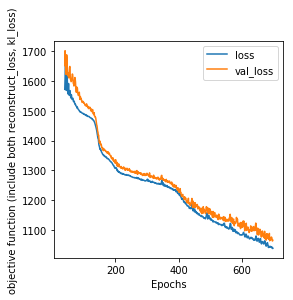

In [30]:
# Visualize training performance
history_df = pd.DataFrame(hist.history)
history_df = history_df.iloc[40:699]

#hist_plot_file = os.path.join('figures', 'onehidden_vae_training.pdf')

hist_plot_file = "(Lr_0.002)(NN6K_z100_a1.0_6L_0.1t)obj_func_per_dp(4cancers).pdf"#"temp.pdf"#
ax = history_df.plot()

ratio = 0.95
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
# the abs method is used to make sure that all numbers are positive
# because x and y axis of an axes maybe inversed.
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

ax.set_xlabel('Epochs')
ax.set_ylabel('objective function (include both reconstruct_loss, kl_loss)')
ax.set_title('')
fig = ax.get_figure()
#fig.savefig(hist_plot_file)

Encoder model

In [33]:
#extract the encoder part

# Model to compress input
#encoder = Model(rnaseq_input, [z_mean_encoded, z_log_var_encoded])
encoder = Model(rnaseq_input, z)
encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 13854)        0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 6400)         88672000    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 6400)         25600       dense_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 6400)         0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
dense_2 (D

In [34]:
encoder2 = Model(rnaseq_input, [z_mean_encoded, z_log_var_encoded])
encoder2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 13854)        0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 6400)         88672000    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 6400)         25600       dense_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 6400)         0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
dense_2 (D

In [35]:
# Encode rnaseq into the hidden/latent representation - and save output
#encoded_rnaseq_df

z_df = encoder.predict_on_batch(Exprframe_test)

z_df = pd.DataFrame(z_df, index=Exprframe_test.index)

z_df.columns.name = 'sample_id'
z_df.columns = z_df.columns + 1
z_df.head(10)

[z_mean_d, z_log_var_d]= encoder2.predict_on_batch(Exprframe_test)
z_mean_df = pd.DataFrame(z_mean_d, index=Exprframe_test.index)

z_mean_df.columns.name = 'sample_id'
z_mean_df.columns = z_mean_df.columns + 1


z_log_var_df = pd.DataFrame(z_log_var_d, index=Exprframe_test.index)

z_log_var_df.columns.name = 'sample_id'
z_log_var_df.columns = z_log_var_df.columns + 1


Decoder model

In [36]:
# build a generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim, ))  # can generate from any sampled z vector

_x_decoded_l7 = decoderl7_reconstruct(decoder_input)
_x_decoded_l6 = decoderl6_reconstruct(_x_decoded_l7)
_x_decoded_l5 = decoderl5_reconstruct(_x_decoded_l6)
_x_decoded_l4 = decoderl4_reconstruct(_x_decoded_l5)
_x_decoded_l3 = decoderl3_reconstruct(_x_decoded_l4)

_x_decoded_l2 = decoderl2_reconstruct(_x_decoded_l3)

_x_decoded_l1 = decoderl1_reconstruct(_x_decoded_l2)
_x_decoded_l0 = decoderl0_reconstruct(_x_decoded_l1)

decoder = Model(decoder_input, _x_decoded_l0)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_11 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_12 (Dense)             (None, 400)               80400     
_________________________________________________________________
dense_13 (Dense)             (None, 800)               320800    
_________________________________________________________________
dense_14 (Dense)             (None, 1600)              1281600   
_________________________________________________________________
dense_15 (Dense)             (None, 3200)              5123200   
__________

Observe reconstruction fidelity

In [37]:
#original input RNAseq data
rnaseq_df = Exprframe_test
rnaseq_df.head(5)

,ENSG00000000003.13,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,ENSG00000001460.16,...,ENSG00000280237.1,ENSG00000280411.1,ENSG00000280734.1,ENSG00000280789.1,ENSG00000280798.1,ENSG00000280832.1,ENSG00000281332.1,ENSG00000281398.1,ENSG00000281406.1,ENSG00000281649.1
TCGA-CK-6748-01A,0.749073,0.528939,0.205384,0.212993,0.416002,0.344308,0.399756,0.324282,0.210181,0.373076,...,0.260418,0.220510,0.463019,0.185867,0.208294,0.139837,0.250657,0.485760,0.558515,0.481088
TCGA-CM-4746-01A,0.675663,0.526757,0.222663,0.403797,0.164909,0.155398,0.472256,0.316475,0.197026,0.393945,...,0.314234,0.160185,0.485230,0.286112,0.044239,0.424512,0.107287,0.519237,0.584396,0.317193
TCGA-AA-3715-01A,0.383964,0.159524,0.203441,0.438150,0.626420,0.406272,0.285641,0.195765,0.193426,0.367600,...,0.338382,0.331248,0.443230,0.221247,0.145159,0.294008,0.146868,0.587215,0.440557,0.247084
TCGA-ZF-AA4X-01A,0.815071,0.442609,0.414677,0.523911,0.240663,0.250479,0.430704,0.710042,0.303903,0.585601,...,0.235394,0.205337,0.494290,0.339904,0.542905,0.628186,0.350470,0.505609,0.322389,0.534488
TCGA-E2-A15I-01A,0.445437,0.440366,0.708878,0.406047,0.460415,0.433581,0.350823,0.496033,0.456054,0.531784,...,0.583568,0.372217,0.557864,0.432056,0.343792,0.544838,0.280159,0.480700,0.344123,0.724999


In [38]:
# How well does the model reconstruct the input RNAseq data
input_rnaseq_reconstruct = decoder.predict(np.array(z_df))
input_rnaseq_reconstruct = pd.DataFrame(input_rnaseq_reconstruct, index=rnaseq_df.index,
                                        columns=rnaseq_df.columns)
input_rnaseq_reconstruct.head(5)

,ENSG00000000003.13,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,ENSG00000001460.16,...,ENSG00000280237.1,ENSG00000280411.1,ENSG00000280734.1,ENSG00000280789.1,ENSG00000280798.1,ENSG00000280832.1,ENSG00000281332.1,ENSG00000281398.1,ENSG00000281406.1,ENSG00000281649.1
TCGA-CK-6748-01A,0.630104,0.358433,0.264448,0.288246,0.386009,0.390725,0.428127,0.330503,0.188066,0.445461,...,0.367091,0.458372,0.362405,0.252112,0.323799,0.221584,0.275924,0.503156,0.473347,0.378491
TCGA-CM-4746-01A,0.669615,0.422436,0.193599,0.360877,0.314524,0.227667,0.441841,0.320122,0.199381,0.398690,...,0.328461,0.334631,0.408812,0.278008,0.202333,0.230239,0.284486,0.545402,0.600694,0.337249
TCGA-AA-3715-01A,0.622518,0.326648,0.190627,0.313258,0.418419,0.342763,0.411562,0.281887,0.183362,0.410195,...,0.330843,0.433983,0.373656,0.248503,0.248951,0.245783,0.267233,0.480531,0.539360,0.291560
TCGA-ZF-AA4X-01A,0.644204,0.507525,0.354691,0.470252,0.431265,0.479479,0.473065,0.458074,0.302620,0.540033,...,0.272192,0.340921,0.489686,0.349190,0.364265,0.504401,0.345156,0.526444,0.491752,0.432605
TCGA-E2-A15I-01A,0.565914,0.462406,0.637629,0.462654,0.461906,0.548986,0.418634,0.427729,0.398890,0.532044,...,0.499792,0.386805,0.376231,0.392165,0.421785,0.459153,0.409231,0.507025,0.387143,0.674823


In [39]:
#test the fidelity
reconstruction_fidelity = abs(rnaseq_df - input_rnaseq_reconstruct)

reconstruction_loss = reconstruction_fidelity.mean(axis = 1)

#print(reconstruction_loss)

gene_mean = reconstruction_fidelity.mean(axis=0)
gene_abssum = reconstruction_fidelity.abs().sum(axis=0).divide(rnaseq_df.shape[0])
gene_summary = pd.DataFrame([gene_mean, gene_abssum], index=['gene mean', 'gene abs(sum)']).T
#gene_summary.sort_values(by='gene abs(sum)', ascending=False).head(20)

In [40]:
reconstruction_loss_used = losses.mean_absolute_error(rnaseq_df, input_rnaseq_reconstruct) #* original_dim
with tf.Session() as sess:
    #print the reconstruction loss that we calculated
    mean_reconstruct_loss = sess.run(K.mean(reconstruction_loss_used))
    print ("%.11f" % mean_reconstruct_loss)

0.07543522471


In [41]:
kl_loss = - 0.5 * K.sum(1 + z_log_var_d - K.square(z_mean_d) - 
                                K.exp(z_log_var_d), axis=-1) / latent_dim
with tf.Session() as sess:
    #print the kl loss that we calculated
    mean_kl_loss = sess.run(K.mean(kl_loss))
    print ("%.11f" %mean_kl_loss)

0.42316198349


In [42]:
print ("%.11f" % (mean_reconstruct_loss + alpha * mean_kl_loss))

0.49859720820


In [ ]:
# Encode rnaseq into the hidden/latent representation - and save output
#encoded_rnaseq_df

z_df = encoder.predict_on_batch(Exprframe)

z_df = pd.DataFrame(z_df, index=Exprframe.index)

z_df.columns.name = 'sample_id'
z_df.columns = z_df.columns + 1
z_df.head(10)

encoded_file = "counts_data/vae_compressed/encoded_5cancers_rnaseq_vae(perSp,a1.0,unlabel,0.2_var,8LF6k4,z50,minmax).tsv"
#encoded_file = "counts_data/vae_compressed/encoded_4_cancers_rnaseq_vae(perSp,a0,unlabel,0.2_var,3LF6k,z500,minmax).tsv"
z_df.to_csv(encoded_file, sep='\t')

In [ ]:
#####################################################